<a href="https://colab.research.google.com/github/pedrocassioG/criar-e-avaliar-modelos/blob/main/projeto_inicial_classificacao__Primeiros_passos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação: Primeiros passos

Neste projeto, iremos analisar dados de uma campanha de marketing para aderência de investimentos. O intuito é usar as informações dos dados para prever se os clientes de um banco vão aplicar o dinheiro em um investimento ou não.

Essa previsão será feita utilizando machine learning e este notebook vai conter os passos para se obter um modelo capaz de realizar as previsões, desde a **leitura**, **análise exploratória**, **separação** e **transformação** dos dados, até o **ajuste**, **avaliação** e **comparação** de modelos de classificação.

# Análise exploratória

## Fazendo a leitura dos dados

Podemos realizar a leitura dos dados a partir da biblioteca `pandas`. Por conta disso, vamos realizar a importação da biblioteca com o comando `import pandas as pd`.

Como o arquivo de dados está no formato *csv*, vamos realizar a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/marketing_investimento.csv')

In [3]:
dados.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


Para criar modelos de classificação, precisamos utilizar dados de qualidade, sem inconsistências e sem dados faltantes. Vamos checar se existem dados nulos e o tipo dos dados de cada coluna na base de dados a partir do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


In [5]:
import plotly.express as px

In [6]:
dados.columns

Index(['idade', 'estado_civil', 'escolaridade', 'inadimplencia', 'saldo',
       'fez_emprestimo', 'tempo_ult_contato', 'numero_contatos',
       'aderencia_investimento'],
      dtype='object')

In [7]:
px.histogram(dados, x='aderencia_investimento' , text_auto=True)

In [8]:
px.histogram(dados, x='estado_civil', text_auto=True, color = 'aderencia_investimento', barmode='group')


In [9]:
px.histogram(dados, x='escolaridade', text_auto=True, color = 'aderencia_investimento', barmode='group')


In [10]:
px.histogram(dados, x='inadimplencia', text_auto=True, color = 'aderencia_investimento', barmode='group')


In [11]:
px.histogram(dados, x='fez_emprestimo', text_auto=True, color = 'aderencia_investimento', barmode='group')


In [12]:
px.box(dados, x='idade', color = 'aderencia_investimento')

In [13]:
px.box(dados, x='saldo', color = 'aderencia_investimento')


In [14]:
px.box(dados, x='tempo_ult_contato', color = 'aderencia_investimento')


In [15]:
px.box(dados, x='numero_contatos', color = 'aderencia_investimento')


In [16]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [17]:
X = dados.drop('aderencia_investimento', axis = 1)
y = dados['aderencia_investimento']

In [18]:
X

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,nao,242,nao,587,1
1,42,casado (a),medio,nao,1289,nao,250,4
2,23,solteiro (a),superior,nao,363,nao,16,18
3,58,divorciado (a),superior,nao,1382,nao,700,1
4,50,casado (a),medio,nao,3357,nao,239,4
...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6
1264,35,solteiro (a),superior,nao,5958,nao,215,1
1265,30,solteiro (a),superior,nao,-477,sim,1532,2
1266,42,casado (a),superior,nao,2187,nao,525,3


In [19]:
y

,aderencia_investimento
0,sim
1,sim
2,nao
3,sim
4,sim
...,...
1263,sim
1264,sim
1265,sim
1266,sim


In [20]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [21]:
colunas = X.columns

In [22]:
colunas

Index(['idade', 'estado_civil', 'escolaridade', 'inadimplencia', 'saldo',
       'fez_emprestimo', 'tempo_ult_contato', 'numero_contatos'],
      dtype='object')

In [23]:
one_hot = make_column_transformer((OneHotEncoder(drop = 'if_binary'),
                                   ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo'] ),
                                  remainder= 'passthrough',
                                  sparse_threshold=0
                                  )

In [24]:
X = one_hot.fit_transform(X)

In [25]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [26]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
label_enconder = LabelEncoder()

In [29]:
y = label_enconder.fit_transform(y)

In [30]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, stratify = y, random_state = 5)

In [33]:
from sklearn.dummy import DummyClassifier


In [34]:
dummy = DummyClassifier()
dummy.fit(X_treino, y_treino)
dummy.score(X_teste, y_teste)

0.6025236593059937

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
arvore = DecisionTreeClassifier(random_state = 5)
arvore.fit(X_treino, y_treino)


DecisionTreeClassifier(random_state=5)

In [37]:
arvore.predict(X_teste)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [38]:
arvore.score(X_teste, y_teste)

0.6656151419558359

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [40]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']

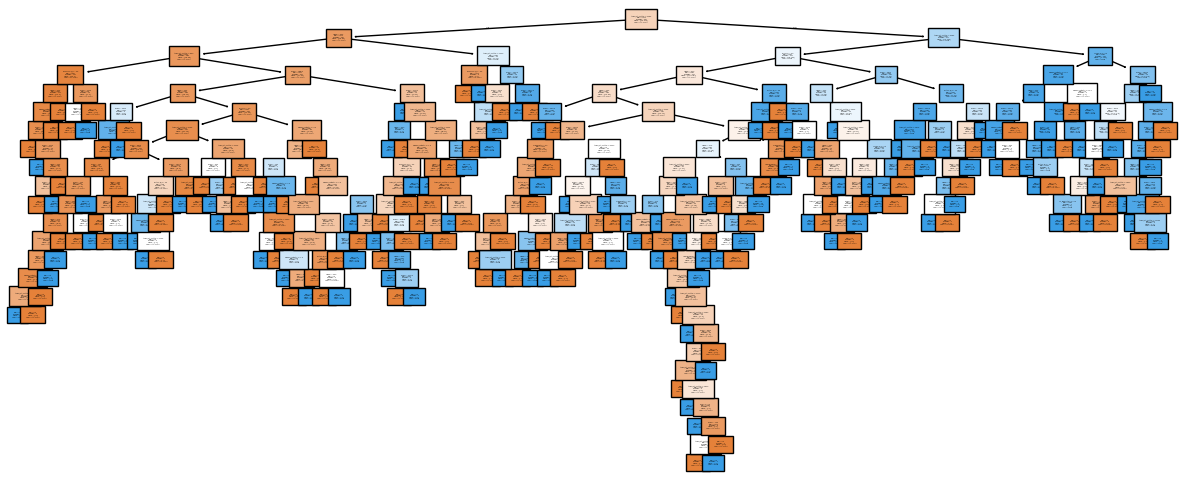

In [41]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names= ['não aderiu', 'aderiu'], fontsize = 1, feature_names = nome_colunas)
plt.show()

In [42]:
arvore.score(X_treino, y_treino)

1.0

In [43]:
arvore = DecisionTreeClassifier(max_depth = 3, random_state = 5)
arvore.fit(X_treino, y_treino)


DecisionTreeClassifier(max_depth=3, random_state=5)

In [44]:
arvore.score(X_treino, y_treino)

0.7613038906414301

In [45]:
arvore.score(X_teste, y_teste)

0.7160883280757098

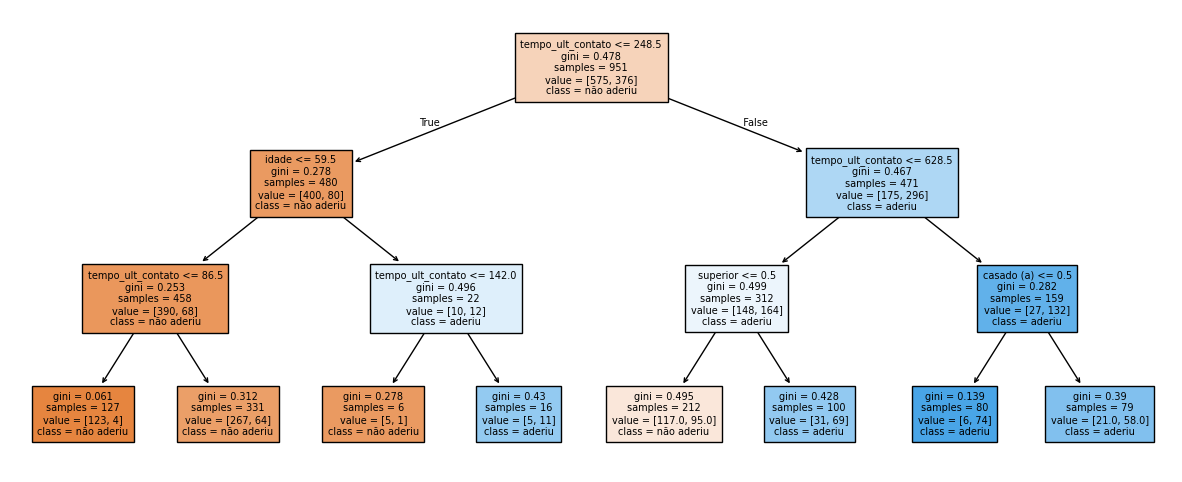

In [46]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names= ['não aderiu', 'aderiu'], fontsize = 7, feature_names = nome_colunas)
plt.show()

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
normalizacao = MinMaxScaler()
X_treino_normalizado = normalizacao.fit_transform(X_treino)

In [49]:
pd.DataFrame(X_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier()

In [52]:
knn.fit(X_treino_normalizado, y_treino)

KNeighborsClassifier()

In [53]:
X_teste_normalizado = normalizacao.transform(X_teste)

In [54]:
knn.score(X_teste_normalizado, y_teste)

0.6876971608832808

In [55]:
print(f'Acurácia Dummy: {dummy.score(X_teste, y_teste)}')
print(f'Acurácia Árvore: {arvore.score(X_teste, y_teste)}')
print(f'Acurácia KNN: {knn.score(X_teste_normalizado, y_teste)}')

Acurácia Dummy: 0.6025236593059937
Acurácia Árvore: 0.7160883280757098
Acurácia KNN: 0.6876971608832808


In [56]:
import pickle

In [57]:
with open('modelo_onehotenc.pkl', 'wb') as arquivo:
  pickle.dump(one_hot, arquivo)

In [58]:
with open('modelo_arvore.pkl', 'wb') as arquivo:
  pickle.dump(arvore, arquivo)

In [59]:
dados


,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [60]:
novo_dado = {
    'idade': [45],
    'estado_civil':['solteiro (a)'],
    'escolaridade':['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}

In [61]:
novo_dado = pd.DataFrame(novo_dado)
novo_dado

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,solteiro (a),superior,nao,23040,nao,800,4


In [62]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotenc.pkl')
modelo_arvore = pd.read_pickle('/content/modelo_arvore.pkl')

In [63]:
novo_dado = modelo_one_hot.transform(novo_dado)
modelo_arvore.predict(novo_dado)

array([1])